In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/ortho_knnnb.csv')

In [ ]:
print(len(data.columns))

7


In [ ]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [ ]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
corr=data.corr()
print(corr)

                          pelvic_incidence  ...  degree_spondylolisthesis
pelvic_incidence                  1.000000  ...                  0.638743
pelvic_tilt numeric               0.629199  ...                  0.397862
lumbar_lordosis_angle             0.717282  ...                  0.533667
sacral_slope                      0.814960  ...                  0.523557
pelvic_radius                    -0.247467  ...                 -0.026065
degree_spondylolisthesis          0.638743  ...                  1.000000

[6 rows x 6 columns]


In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = data.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

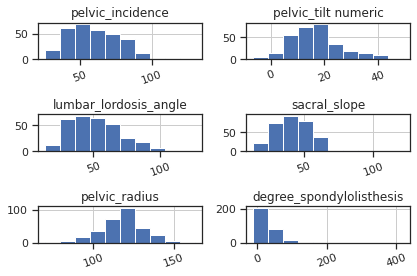

In [ ]:
data.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


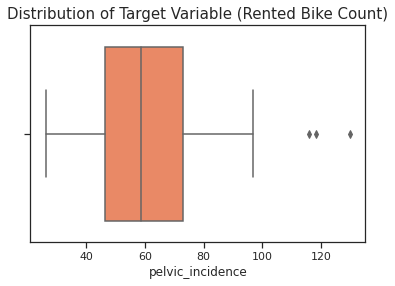

In [ ]:
sns.boxplot(data['pelvic_incidence'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Rented Bike Count)', fontsize = 15)

# display the plot
plt.show()

Correlation between variables: 


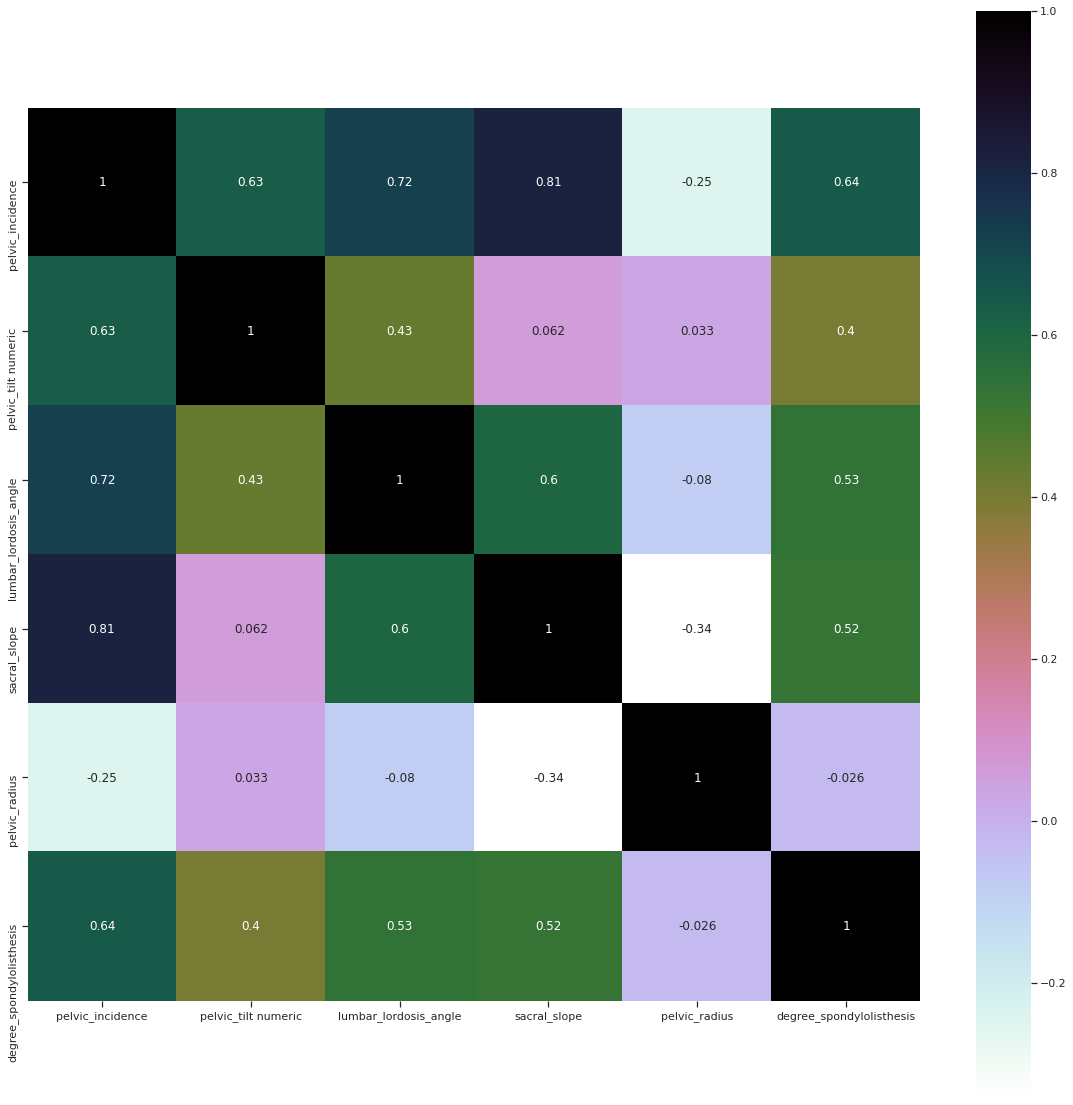

In [ ]:
print("Correlation between variables: ")
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

In [ ]:
df1=data
df2=data

In [ ]:
df1.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
df2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
df2.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
Q1 = np.percentile(data['pelvic_incidence'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['pelvic_incidence'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['pelvic_incidence'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim) 

Q1 25 percentile of the given data is,  46.43422228
Q1 50 percentile of the given data is,  58.691038135
Q1 75 percentile of the given data is,  72.79974705000001
Interquartile range is 26.365524770000007
low limit: 6.885935124999989
upper limit: 112.34803420500002


In [ ]:
df2.pelvic_incidence = df1['pelvic_incidence'][df1.pelvic_incidence< up_lim]
df2.pelvic_incidence=df2['pelvic_incidence'][df2.pelvic_incidence> low_lim]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


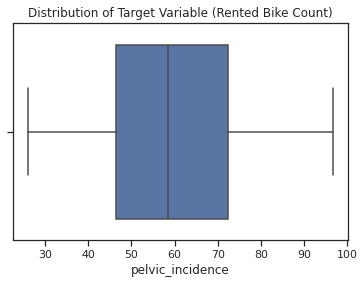

In [ ]:
sns.boxplot(df2['pelvic_incidence'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


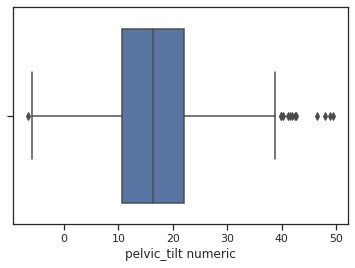

In [ ]:
sns.boxplot(df2['pelvic_tilt numeric'])

In [ ]:
Q1 = np.percentile(data['pelvic_tilt numeric'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['pelvic_tilt numeric'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['pelvic_tilt numeric'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim) 

Q1 25 percentile of the given data is,  10.67427877
Q1 50 percentile of the given data is,  16.35768863
Q1 75 percentile of the given data is,  22.05899168
Interquartile range is 11.384712909999998
low limit: -6.4027905949999955
upper limit: 39.13606104499999


In [ ]:
df2['pelvic_tilt numeric']= df2['pelvic_tilt numeric'][df2['pelvic_tilt numeric']< up_lim]
df2['pelvic_tilt numeric']= df2['pelvic_tilt numeric'][df2['pelvic_tilt numeric']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


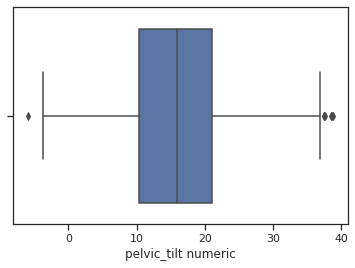

In [ ]:
sns.boxplot(df2['pelvic_tilt numeric'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


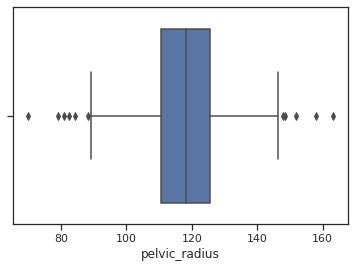

In [ ]:
sns.boxplot(df2['pelvic_radius'])

In [ ]:
Q1 = np.percentile(data['pelvic_radius'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['pelvic_radius'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['pelvic_radius'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim) 

Q1 25 percentile of the given data is,  110.7094349
Q1 50 percentile of the given data is,  118.2681783
Q1 75 percentile of the given data is,  125.45517495000001
Interquartile range is 14.745740050000009
low limit: 88.590824825
upper limit: 147.57378502500003


In [ ]:
df2['pelvic_radius'] = df2.pelvic_radius[df2['pelvic_radius']< up_lim]
df2['pelvic_radius'] = df2.pelvic_radius[df2['pelvic_radius']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


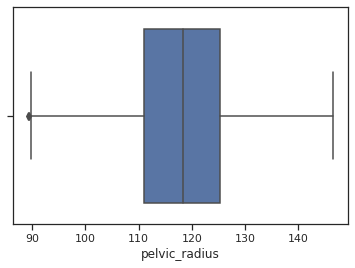

In [ ]:
sns.boxplot(df2.pelvic_radius )

In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 0
pelvic_radius               11
degree_spondylolisthesis     0
class                        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


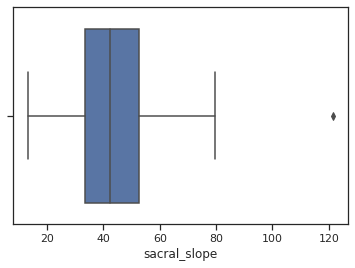

In [ ]:
sns.boxplot(df2['sacral_slope'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


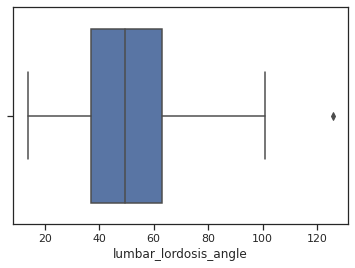

In [ ]:
sns.boxplot(df2['lumbar_lordosis_angle'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


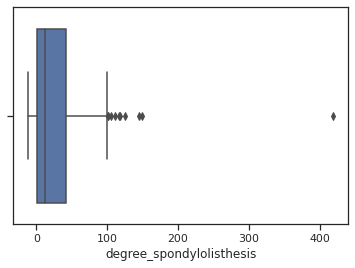

In [ ]:
sns.boxplot(df2['degree_spondylolisthesis'])

In [ ]:
Q1 = np.percentile(data['degree_spondylolisthesis'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['degree_spondylolisthesis'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['degree_spondylolisthesis'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim) 

In [ ]:
df2['degree_spondylolisthesis'] = df2[df2['degree_spondylolisthesis']< up_lim]
df2['degree_spondylolisthesis']=df2[df2['degree_spondylolisthesis']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


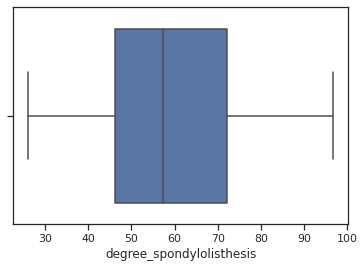

In [ ]:
sns.boxplot(df2['degree_spondylolisthesis'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          307 non-null    float64
 1   pelvic_tilt numeric       297 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             299 non-null    float64
 5   degree_spondylolisthesis  298 non-null    object 
 6   class                     310 non-null    object 
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 0
pelvic_radius               11
degree_spondylolisthesis    12
class                        0
dtype: int64

In [ ]:
df2.fillna(value=df2.mean())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,63.027818,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,39.056951,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,68.832021,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,69.297008,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,49.712859,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,47.903565,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,53.936748,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,61.446597,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,45.252792,Normal


In [ ]:
df2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,63.0278,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,39.057,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,68.832,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,69.297,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,49.7129,Abnormal


In [ ]:
df2['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [ ]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [ ]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis     object
class                        object
dtype: object

In [ ]:
df2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis     object
class                        object
dtype: object

In [ ]:
df2['class']=df2['class'].map({'Abnormal':1,'Normal':0})

In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 0
pelvic_radius               11
degree_spondylolisthesis    12
class                        0
dtype: int64

In [ ]:
df2.astype('float64')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,63.027818,1.0
1,39.056951,10.060991,25.015378,28.995960,114.405425,39.056951,1.0
2,68.832021,22.218482,50.092194,46.613539,105.985135,68.832021,1.0
3,69.297008,24.652878,44.311238,44.644130,101.868495,69.297008,1.0
4,49.712859,9.652075,28.317406,40.060784,108.168725,49.712859,1.0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,47.903565,0.0
306,53.936748,20.721496,29.220534,33.215251,114.365845,53.936748,0.0
307,61.446597,22.694968,46.170347,38.751628,125.670725,61.446597,0.0
308,45.252792,8.693157,41.583126,36.559635,118.545842,45.252792,0.0


In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 0
pelvic_radius               11
degree_spondylolisthesis    12
class                        0
dtype: int64

In [ ]:
df2=df2.fillna(value=df2.mean())

In [ ]:
df2.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
X=df2.iloc[:,:-1]
y=df2['class']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,63.027818
1,39.056951,10.060991,25.015378,28.995960,114.405425,39.056951
2,68.832021,22.218482,50.092194,46.613539,105.985135,68.832021
3,69.297008,24.652878,44.311238,44.644130,101.868495,69.297008
4,49.712859,9.652075,28.317406,40.060784,108.168725,49.712859


In [ ]:
 min_max_scaler = preprocessing.MinMaxScaler()
 X1= min_max_scaler.fit_transform(X)
 X=pd.DataFrame(X1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7903225806451613


we see with an increase in k value, the accuracy increases to a point before it starts to go down.
We find that the optimal values of K to be 20

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.6935483870967742


In [ ]:
NB gives a less score of 69%.